In [1]:
!conda env list

# conda environments:
#
                         /Users/pengl7/Library/r-miniconda
                         /Users/pengl7/Library/r-miniconda/envs/r-reticulate
base                     /Users/pengl7/opt/anaconda3
GenoML                   /Users/pengl7/opt/anaconda3/envs/GenoML
base2                    /Users/pengl7/opt/anaconda3/envs/base2
genomics                 /Users/pengl7/opt/anaconda3/envs/genomics
matplot_corey            /Users/pengl7/opt/anaconda3/envs/matplot_corey
plot                  *  /Users/pengl7/opt/anaconda3/envs/plot
r-tutorial               /Users/pengl7/opt/anaconda3/envs/r-tutorial
scanpy-env               /Users/pengl7/opt/anaconda3/envs/scanpy-env



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format="retina"

In [2]:
plt.style.use("fivethirtyeight")
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [3]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [4]:
sns.__version__

'0.11.0'

In [5]:
import os
os.chdir('/Users/pengl7/Downloads/WGS/compare-variants/NIST/')

In [6]:
%ls -lth

total 187048
-rw-r--r--  1 pengl7  NIH\Domain Users    21M Oct  1 15:20 long_cleared_UpdateAF.csv
-rw-r-----  1 pengl7  NIH\Domain Users    15M Oct  1 15:06 long_UpdateAF4_with_title
drwxr-xr-x  9 pengl7  NIH\Domain Users   288B Sep 29 21:38 NIST_ref/
-rw-r--r--@ 1 pengl7  NIH\Domain Users   301B Sep 28 20:55 sum of variants filtering.csv
-rw-r--r--@ 1 pengl7  NIH\Domain Users   9.7K Sep 28 16:43 sum of variants filtering.xlsx
-rw-r--r--  1 pengl7  NIH\Domain Users    20M Sep 28 13:03 long_cleared_QD.csv
-rw-r--r--  1 pengl7  NIH\Domain Users    21M Sep 25 16:58 long_cleared.csv
-rw-r-----  1 pengl7  NIH\Domain Users    12M Sep 25 10:35 long4_with_title


In [7]:
# the long_cleared_UpdateAF has removed the reads with DP=0 compared to long_UpdateAF4_with_title
df = pd.read_csv("long_cleared_UpdateAF.csv")

In [8]:
print(df.shape)
print()
df.head()

(339860, 11)



,Unnamed: 0,POS,UNMATCH,TYPE,QUAL,FS,AF,DP,GQ,MQ,QD
0,0,10146,1,1,135.96,0.000,1.0,10.0,9.0,51.59,10.52
1,1,11391,1,0,82.28,0.000,1.0,3.0,9.0,39.66,27.43
2,2,11921,1,0,36.77,0.000,0.5,6.0,65.0,43.83,6.13
3,3,12198,1,0,139.03,0.000,1.0,4.0,12.0,49.89,34.76
4,4,12383,1,0,589.03,3.522,1.0,18.0,12.0,44.06,32.72


In [9]:
df.dtypes

Unnamed: 0      int64
POS             int64
UNMATCH         int64
TYPE            int64
QUAL          float64
FS            float64
AF            float64
DP            float64
GQ            float64
MQ            float64
QD            float64
dtype: object

In [10]:
# for the sake of plotting, keep the TYPE as float instead of categorical
#df["TYPE"] = df["TYPE"].astype("category")
df["UNMATCH"] = df["UNMATCH"].astype("category")

In [11]:
df.describe()

,Unnamed: 0,POS,TYPE,QUAL,FS,AF,DP,GQ,MQ,QD
count,339860.000000,3.398600e+05,339860.000000,339860.000000,339860.000000,339860.000000,339860.000000,339860.000000,339860.000000,339860.000000
mean,169939.685877,1.256499e+08,0.161160,480.445892,1.733951,0.516533,19.790970,78.836871,59.430544,20.941954
std,98115.293155,7.641397e+07,0.367679,720.769333,3.342236,0.293848,22.881138,27.074520,2.707473,8.644774
min,0.000000,1.014600e+04,0.000000,30.250000,0.000000,0.000000,0.000000,0.000000,20.000000,0.120000
25%,84969.750000,5.925370e+07,0.000000,233.770000,0.000000,0.279553,14.000000,59.000000,60.000000,13.950000
50%,169939.500000,1.148291e+08,0.000000,385.770000,0.000000,0.500000,19.000000,99.000000,60.000000,20.120000
75%,254909.250000,1.950171e+08,0.000000,647.770000,2.218000,0.757788,24.000000,99.000000,60.000000,28.990000
max,339881.000000,2.489456e+08,1.000000,117461.000000,357.189000,1.000000,3142.000000,99.000000,60.000000,42.890000


In [ ]:
# some choices of plot paramters

# using mulitple="stack"
# ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", multiple="stack", log_scale=True, legend=False)
#  missleading in the edge

# using fill=True
# ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", fill=True, log_scale=True, legend=False)
# color is too light

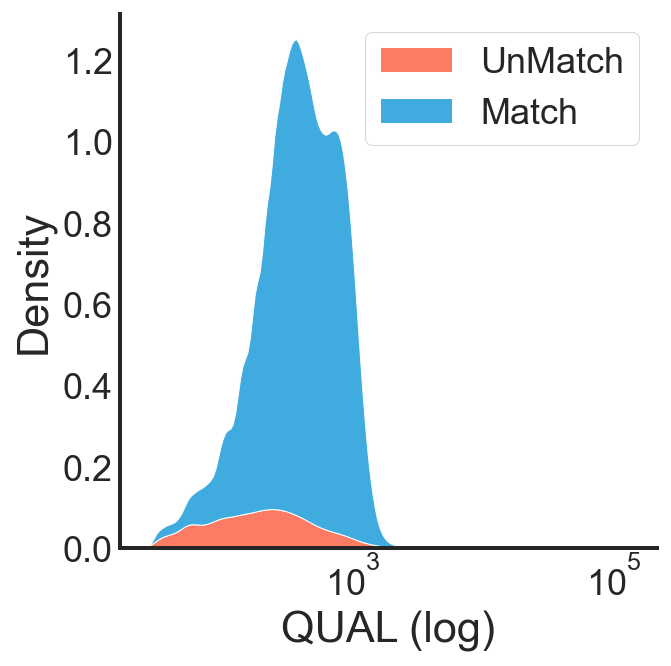

In [28]:
# the choice of multiple='stack' isn't the right becasue it will fill the area between two curvs
ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", multiple="stack", log_scale=True, legend=False)
plt.legend(labels=['UnMatch', 'Match'])
ax.set(xlabel="QUAL (log)")

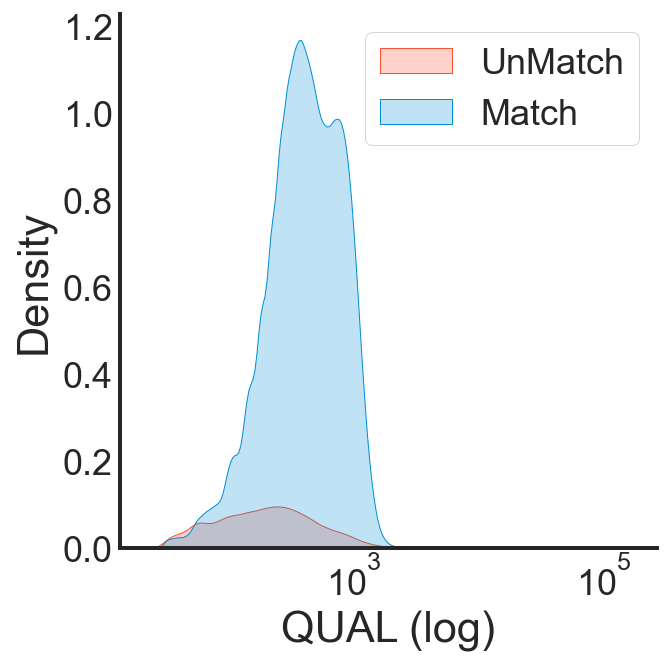

In [48]:
ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", fill=True, log_scale=True, legend=False)
plt.legend(labels=['UnMatch', 'Match'])
ax.set(xlabel="QUAL (log)")

In [26]:
# since some AF=0.5 and AF=1.0 were not updated 
# remove them
filt_af1 = (df["AF"] != 0.5) & (df["AF"] != 1.0)
maf_df_1 = df[filt_af1]
print(maf_df_1.shape)

(297642, 11)


In [48]:
print(len(maf_df_1)/len(df))

0.8757782616371447


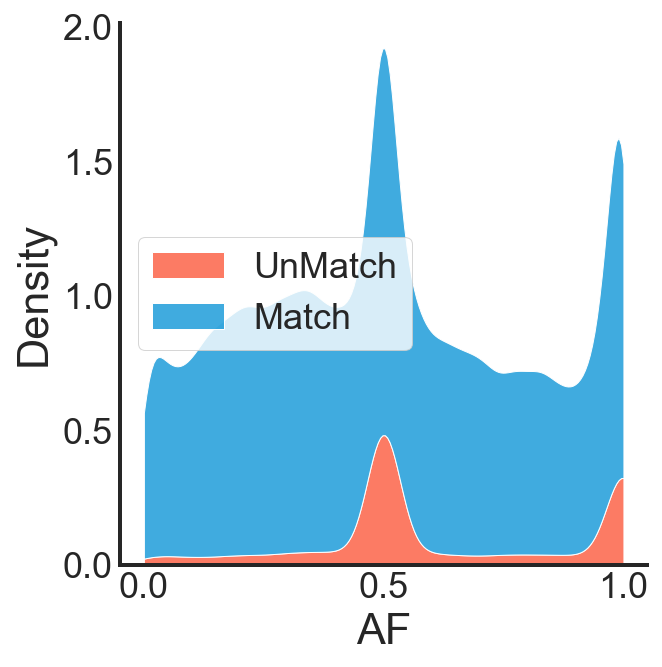

In [54]:
sns.displot(df, x="AF", hue="UNMATCH", kind="kde", multiple="stack", legend=False, cut=0)
plt.legend(loc=6, labels=['UnMatch', 'Match'])

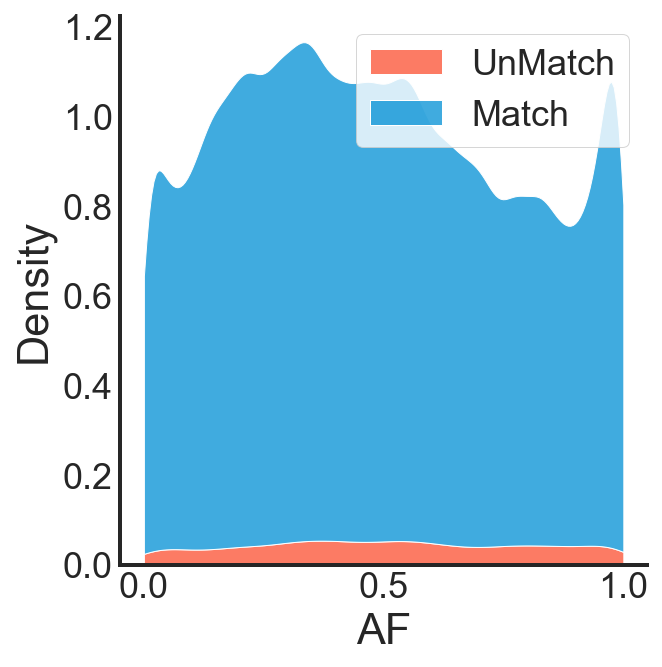

In [29]:
sns.displot(maf_df_1, x="AF", hue="UNMATCH", kind="kde", multiple="stack", legend=False, cut=0)
plt.legend(labels=['UnMatch', 'Match'])

In [17]:
# get the variants with AF < 0.05

filt_af = df["AF"]< 0.05
maf_df = df[filt_af]
print(maf_df.shape)
print(len(maf_df)/len(df))

(16446, 11)
0.04839051374095216


In [16]:
# calculate the number of unmatch in these 897 

maf_df["UNMATCH"].value_counts()

0    15753
1      693
Name: UNMATCH, dtype: int64

In [ ]:
844/(844+53)

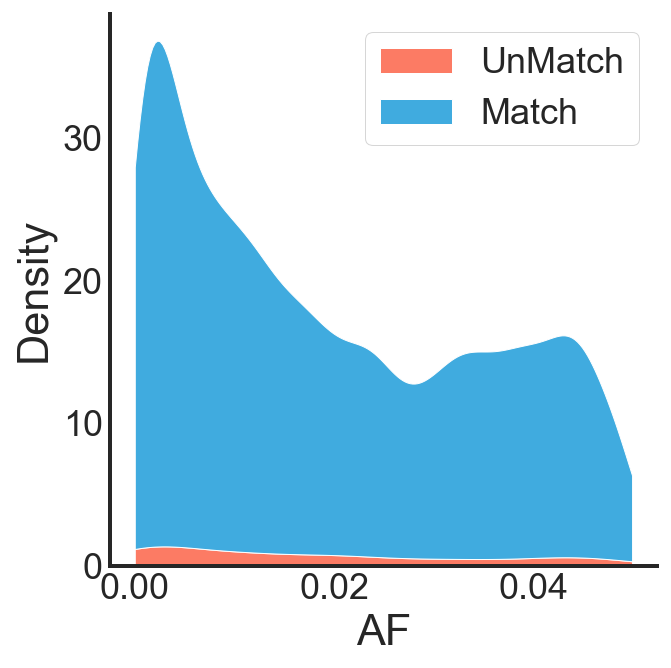

In [22]:
sns.displot(maf_df, x="AF", hue="UNMATCH", kind="kde", multiple="stack", legend=False, cut=0)
plt.legend(labels=['UnMatch', 'Match'])

In [139]:
844/(844+53)

0.9409141583054627

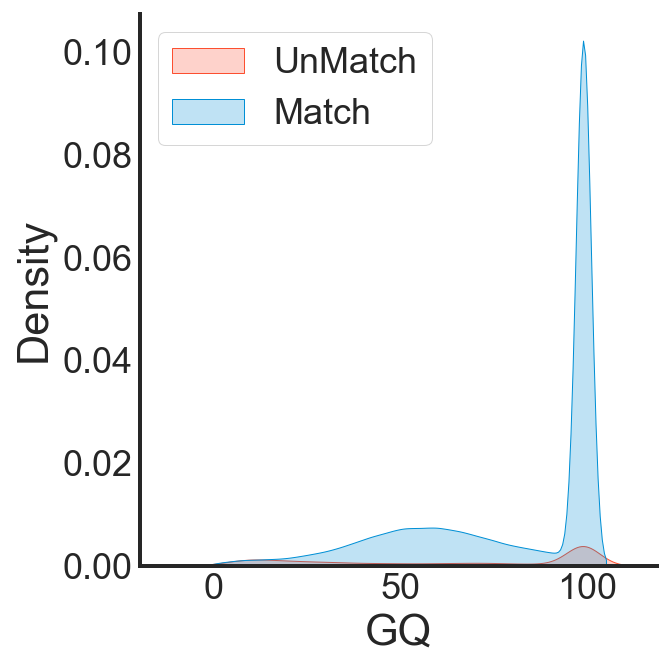

In [52]:
sns.displot(df, x="GQ", hue="UNMATCH", kind="kde", fill=True, legend=False)
plt.legend(loc='upper left', labels=['UnMatch', 'Match'])

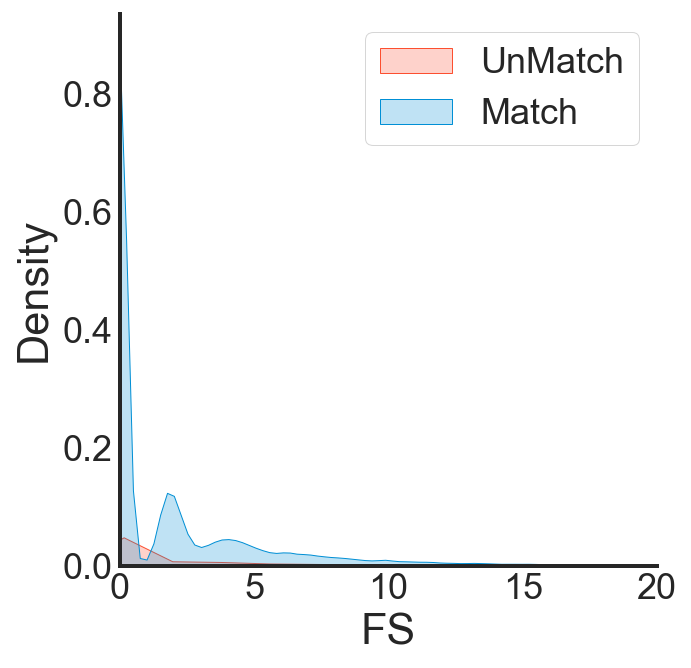

In [56]:
ax=sns.displot(df, x="FS", hue="UNMATCH", kind="kde", fill=True, legend=False)
ax.set(xlim=(0,20))
plt.legend(labels=['UnMatch', 'Match'])

In [170]:
np.log(60)

4.0943445622221

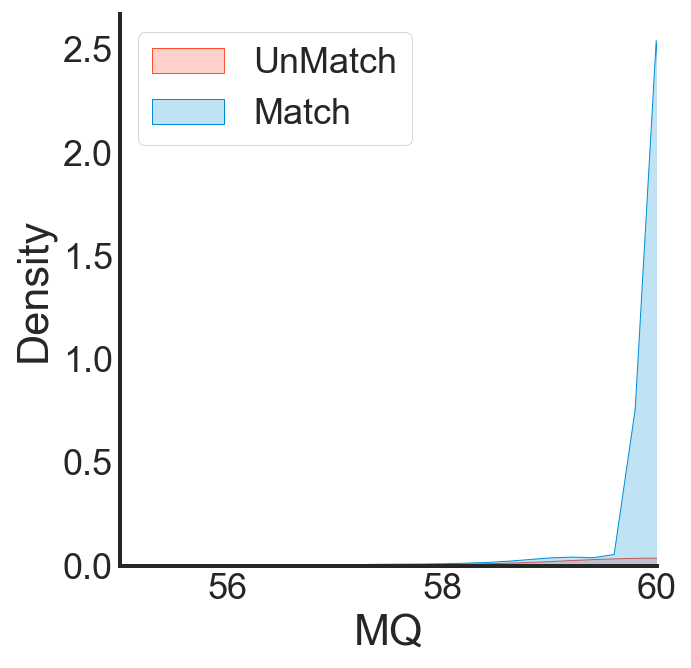

In [283]:
ax=sns.displot(df, x="MQ", hue="UNMATCH", kind="kde", fill=True,legend=False)
ax.set(xlim=(55,60))
plt.legend(loc="upper left", labels=['UnMatch', 'Match'])

In [61]:
df["MQ"].max()

60.0

In [222]:
df["MQ"].min()

20.0

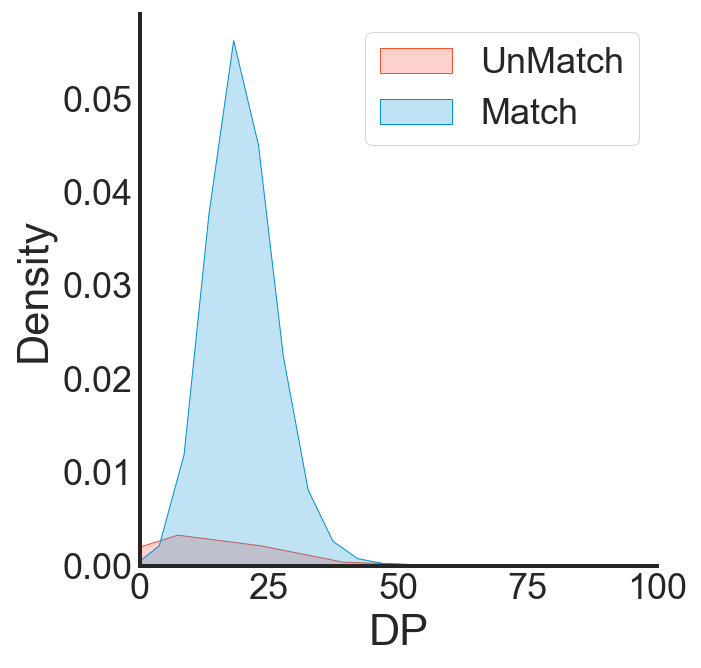

In [64]:
ax = sns.displot(df, x="DP", hue="UNMATCH", kind="kde", fill=True, legend=False)
ax.set(xlim=(0, 100))
plt.legend(labels=['UnMatch', 'Match'])

In [284]:
print(len(df[df["DP"]==0]))
print(len(df[df["DP"]<10]))
print(len(df[df["DP"]>40]))

0
26734
3199


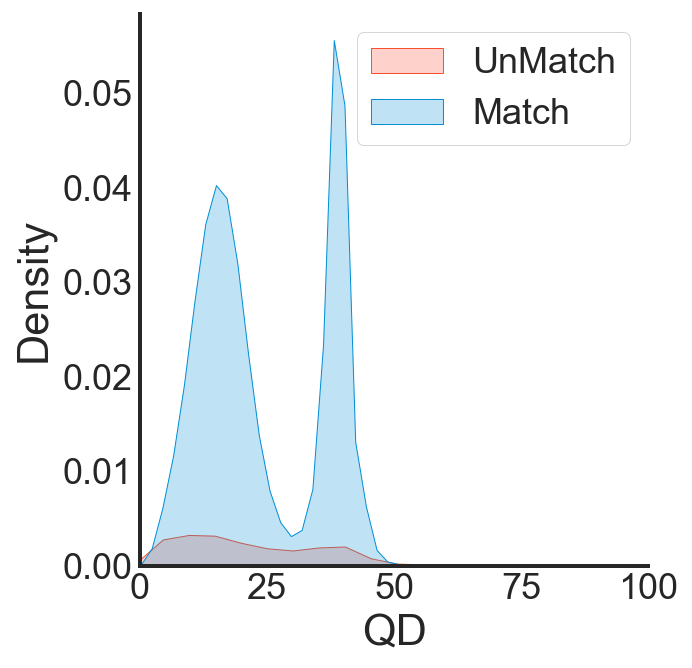

In [69]:
ax = sns.displot(df, x="QD", hue="UNMATCH", kind="kde", fill=True, legend=False)
ax.set(xlim=(0, 100))
plt.legend(labels=['UnMatch', 'Match'])

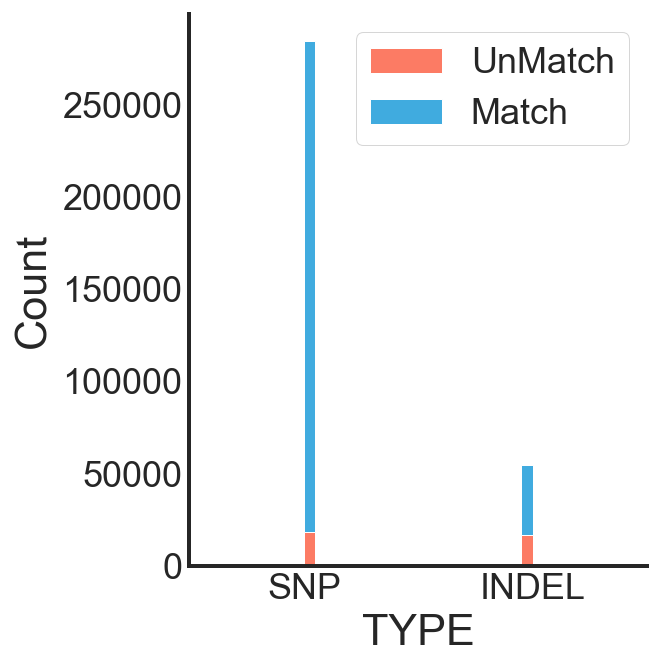

In [106]:
ax=sns.displot(df, x="TYPE", hue="UNMATCH", multiple="stack", legend=False)
plt.legend(labels=['UnMatch', 'Match'])
ax.set_xticklabels(["", 'SNP', "", 'INDEL'])

In [121]:
df["TYPE"] = df["TYPE"].astype("int64")

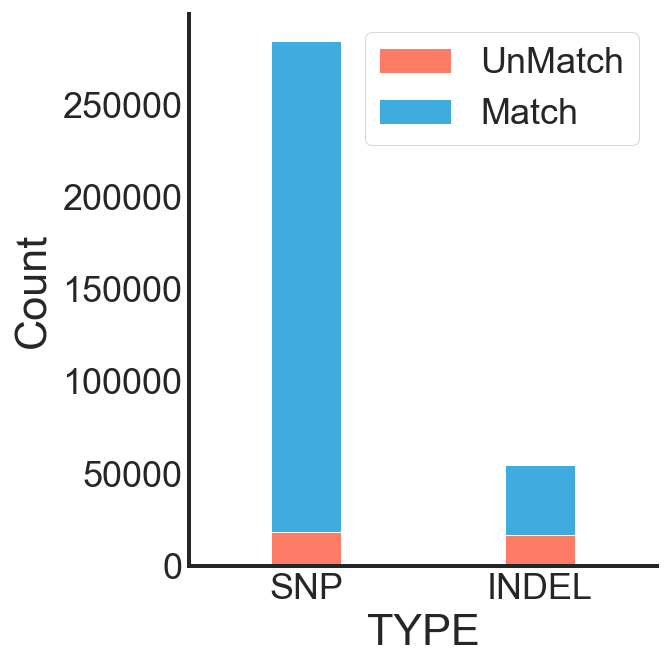

In [134]:
ax=sns.displot(df, x="TYPE", hue="UNMATCH", multiple="stack", legend=False, discrete=True, shrink=0.3)
plt.legend(labels=['UnMatch', 'Match'])
ax.set_xticklabels(['', 'SNP', '',  'INDEL'])

## Check the quality of the whole vcf files

In [ ]:
# draw venn diagram

In [37]:
import matplotlib_venn as venn

In [ ]:
LONG VS REF ON chr1
Found 305039 sites common to both files.
Found 34553 sites only in main file.
Found 9939 sites only in second file.
Found 290 non-matching overlapping sites.
After filtering, kept 339882 out of a possible 339882 Sites

In [154]:
def cal_overlap(c, x_uniq, y_uniq):
    perX = 100*c / (c+x_uniq)
    print("1st overlap: ", perX)
    perY = 100*c / (c+y_uniq)
    print("2nd overlap: ", perY)

In [155]:
cal_overlap(305039,34553,9939)

1st overlap:  89.82514311291196
2nd overlap:  96.84454152353497


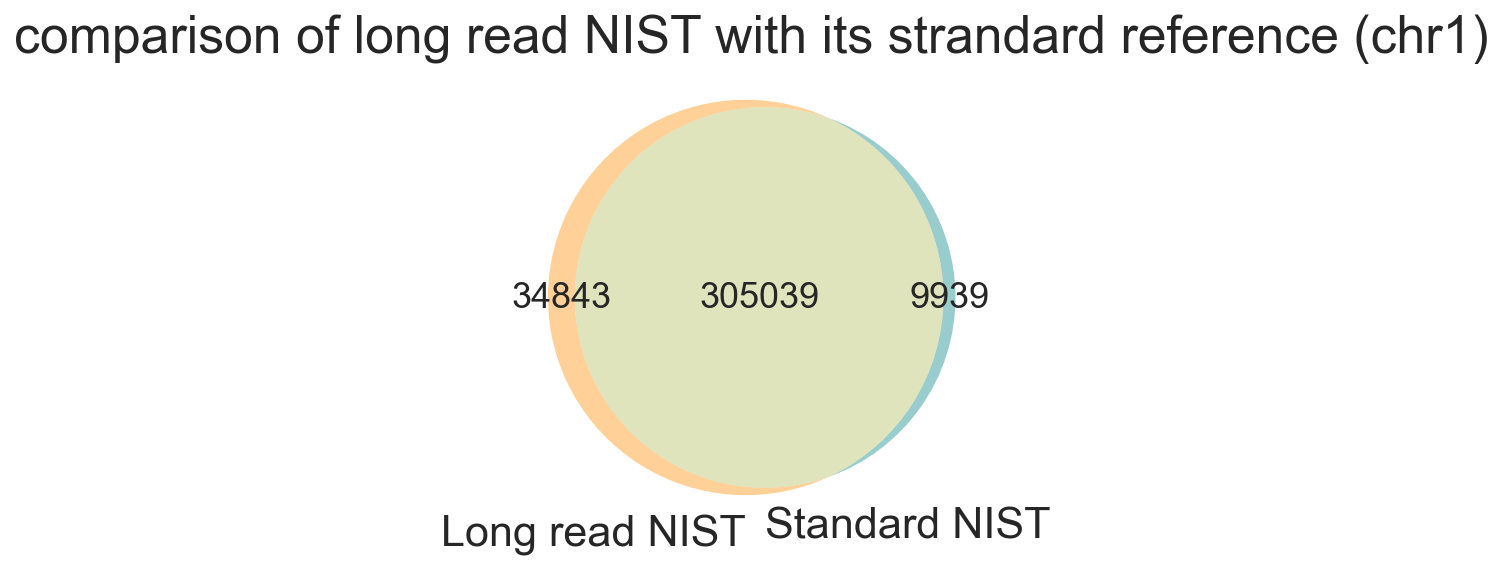

In [151]:
color1 = "darkorange"
color2 = "teal"

plt.title('comparison of long read NIST with its strandard reference (chr1)')
v1=venn.venn2(subsets = (34843, 9939, 305039), set_labels = ('Long read NIST', 'Standard NIST'), 
         set_colors=(color1, color2))
# v1.get_label_by_id('10').set_text('89.8%')
# v1.get_label_by_id('01').set_text('96.9%')

## Check the whole call sets

In [ ]:
REF VS LONG
Found 3901271 sites common to both files.
Found 129076 sites only in main file.
Found 593117 sites only in second file.
Found 8854 non-matching overlapping sites.
After filtering, kept 4039201 out of a possible 4039201 Sites

In [163]:
cal_overlap(3901271,593117,129076)

1st overlap:  86.80316430179148
2nd overlap:  96.7973973456876


In [42]:
3901271+593117

4494388

In [43]:
3901271+129076

4030347

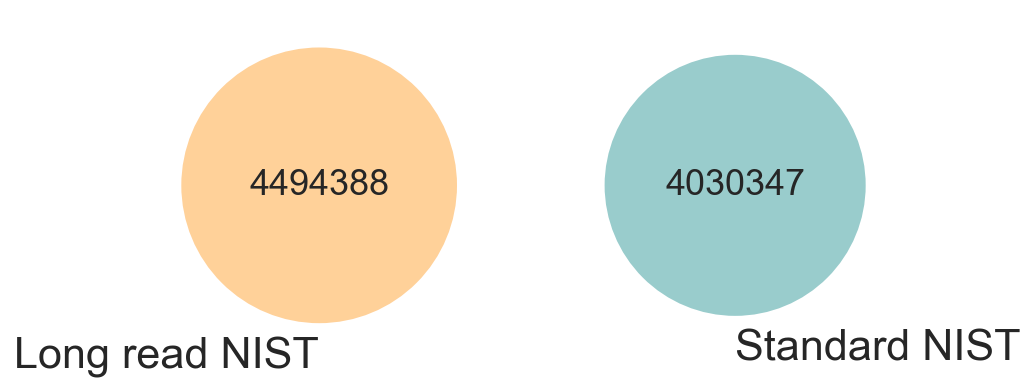

In [46]:
color1 = "darkorange"
color2 = "teal"

v1=venn.venn2(subsets = (4494388, 4030347, 0), set_labels = ('Long read NIST', 'Standard NIST'), 
         set_colors=(color1, color2))
# v1.get_label_by_id('10').set_text('89.8%')
# v1.get_label_by_id('01').set_text('96.9%')

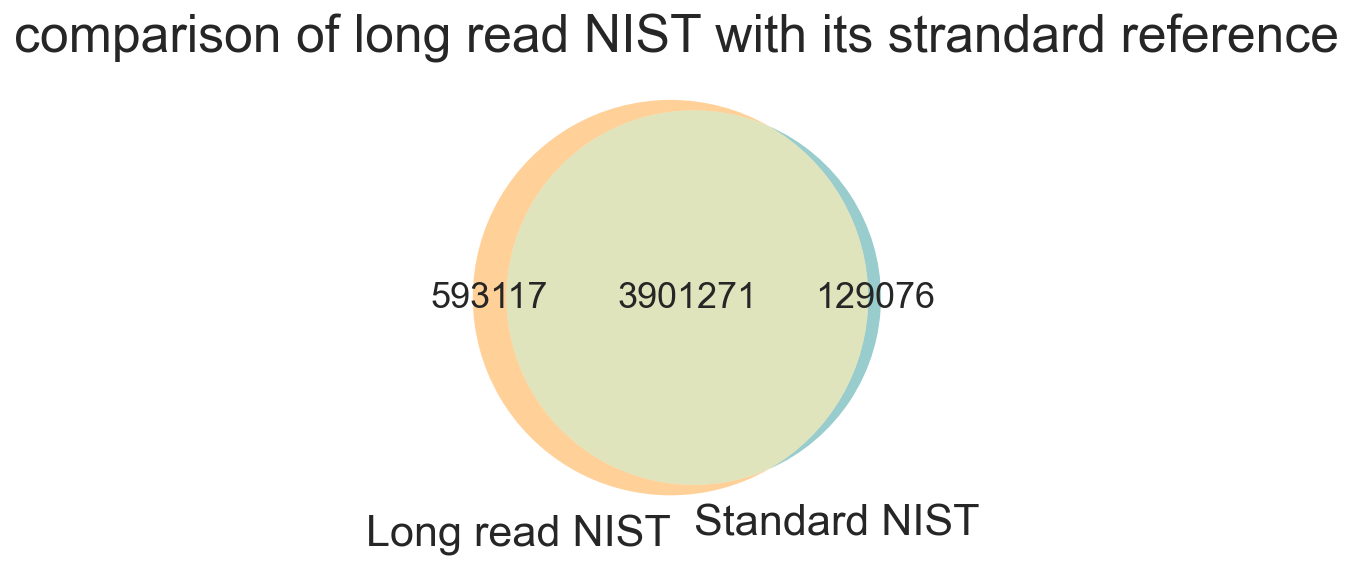

In [164]:
plt.title('comparison of long read NIST with its strandard reference')
v1=venn.venn2(subsets = (593117,129076,3901271), set_labels = ('Long read NIST', 'Standard NIST'), 
         set_colors=(color1, color2))
# v1.get_label_by_id('10').set_text('89.8%')
# v1.get_label_by_id('01').set_text('96.9%')

In [ ]:
REF vs SHORT
Found 3850385 sites common to both files.
Found 108615 sites only in main file.
Found 832304 sites only in second file.
Found 80201 non-matching overlapping sites.
After filtering, kept 4039201 out of a possible 4039201 Sites

In [157]:
color3="blue"
cal_overlap(3850385,832304,108615)

1st overlap:  82.22593898505751
2nd overlap:  97.25650416771911


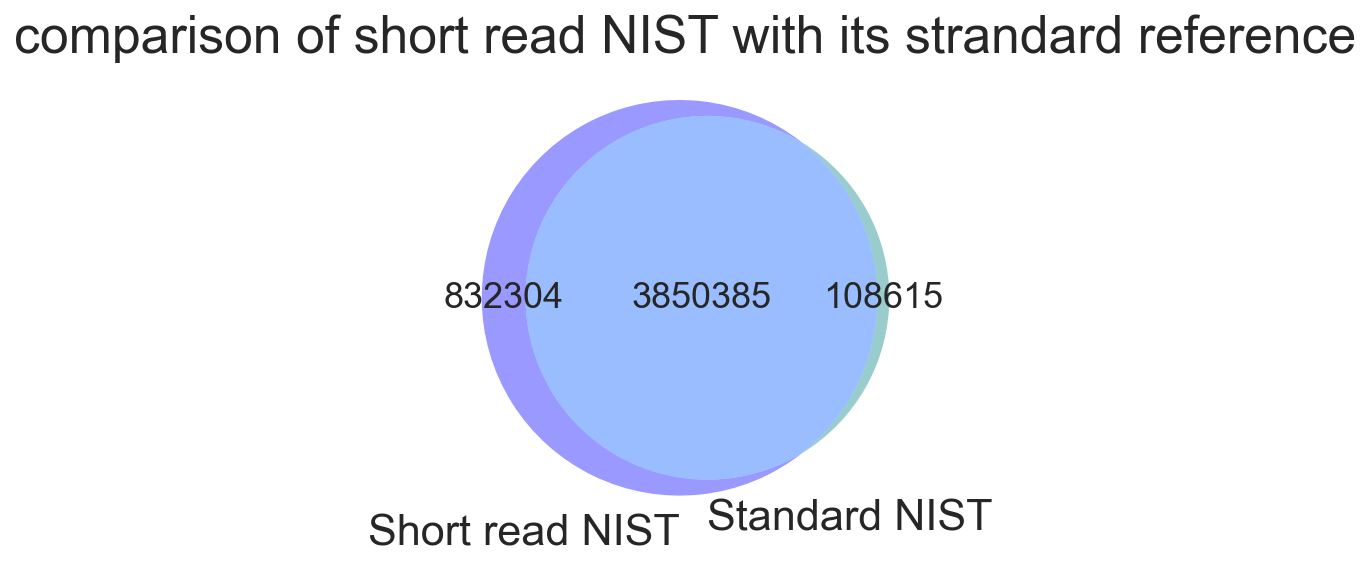

In [161]:
plt.title('comparison of short read NIST with its strandard reference')
v2=venn.venn2(subsets = (832304,108615,3850385), set_labels = ('Short read NIST', 'Standard NIST'), 
         set_colors=(color3, color2))

In [ ]:
# compare short and long
LONG VS SHORT
Found 4154024 sites common to both files.
Found 235884 sites only in main file.
Found 495532 sites only in second file.
Found 113334 non-matching overlapping sites.
After filtering, kept 4503242 out of a possible 4503242 Sites

In [165]:
#  cal_overlap(common, left_uniq, right_uniq)
cal_overlap(4154024, 235884, 495532)

1st overlap:  94.62667554764245
2nd overlap:  89.34238021867034


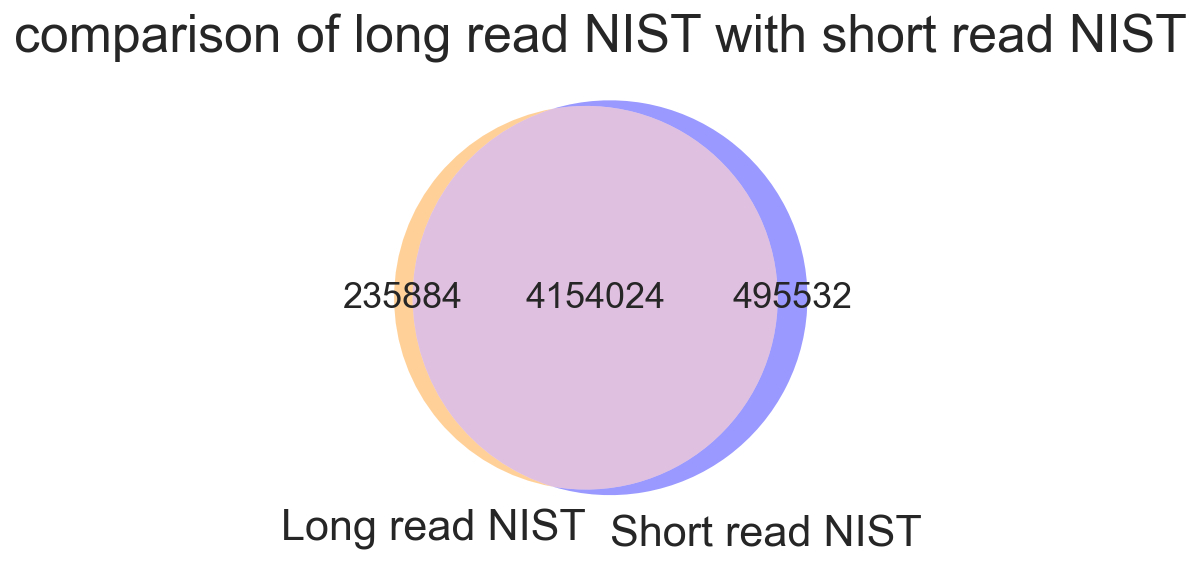

In [167]:
plt.title('comparison of long read NIST with short read NIST')
v4=venn.venn2(subsets = (235884, 495532,4154024), set_labels = ('Long read NIST', 'Short read NIST'), 
         set_colors=(color1, color3))

In [ ]:
# calcualte the three sets

# calculate precison, recall of the sequencing platform

## Calculate metrics:

Ref vs long: 

REF VS LONG
Found 3901271 sites common to both files.
Found 129076 sites only in main file.
Found 593117 sites only in second file.
Found 8854 non-matching overlapping sites.
After filtering, kept 4039201 out of a possible 4039201 Sites

TP = the overlapping: i.e, common
FN = REF_uniqe
FP = Long_unique
TN = 0


recall = 100* TP/(TP+FN) 
precision = 100*TP/(TP+FP)
accuracy = 100* (TP+FN)/(total)



In [273]:

def cal_metrics(overlapping, ref_uniq, sample_uniq, TN=0):
    recall = 100* overlapping/(overlapping+ref_uniq) 
    precision = 100*overlapping/(overlapping+sample_uniq)
    accuracy = 100* (overlapping+ref_uniq)/(overlapping+sample_uniq+ref_uniq+TN)
    print(f'Recall is {recall:.2f}%')
    print(f'Precision is {precision:.2f}%')
    print(f'Accuracy is {accuracy:.2f}%')

In [274]:
cal_metrics(3901271, 129076, 593117)

Recall is 96.80%
Precision is 86.80%
Accuracy is 87.17%


## Do filtering on FS and QD

In [ ]:
# It is better fo remove FS > 60 for SNPs and FS > 200 for Indel
# Also remove those with Guality by Depth 2
# OR remove those with DP < 10 
# or AF < 0.05
# or INDELS

In [30]:
# the FS scores in our data is 
# the value fo FS don't use ""
filt1= (df["FS"] > 60)&(df["TYPE"]==0)
filt2 = (df["FS"] > 200)&(df["TYPE"]==1)
filt3 = (df["QD"] < 2)
filt4 = (df["DP"] < 10)
filt5 = (df["AF"] < 0.05)
filt6 = (df["AF"] < 0.01)
filt7 = (df["MQ"] < 40)

In [31]:
print("SNPs with FS > 60: ", len(df[filt1]))
print("INDEL with FS > 200: ", len(df[filt2]))
print("variants with QD < 2: ", len(df[filt3]))
print("variants with DP < 10: ", len(df[filt4]))
print("variants with AF < 0.05: ", len(df[filt5]))
print("variants with AF < 0.01: ", len(df[filt6]))
print("variants with MQ < 40: ", len(df[filt7]))
print("variants with MQ < 40: ", len(df[filt7]))

SNPs with FS > 60:  13
INDEL with FS > 200:  0
variants with QD < 2:  378
variants with DP < 10:  26744
variants with AF < 0.05:  16446
variants with AF < 0.01:  6018
variants with MQ < 40:  1879
variants with MQ < 40:  1879


In [32]:
df.shape

(339860, 11)

In [33]:
df_filt_FS = df[(~filt1) & (~filt2)]
print(df_filt_FS.shape)

(339847, 11)


In [35]:
df_filt_FS_QD = df_filt_FS[df_filt_FS["QD"] > 2]
print(df_filt_FS_QD.shape)

(339469, 11)


In [238]:
df_filt_FS_QD_AF = df_filt_FS_QD[df_filt_FS_QD["AF"] >= 0.01]
print(df_filt_FS_QD_AF.shape)

(338654, 10)


In [247]:
df_filt_FS_QD_AF_MQ = df_filt_FS_QD_AF[df_filt_FS_QD_AF["MQ"] >= 40]
print(df_filt_FS_QD_AF_MQ.shape)

(336808, 10)


In [248]:
df_filt_FS_QD_AF_MQ_DP = df_filt_FS_QD_AF_MQ[df_filt_FS_QD_AF_MQ["DP"] >= 10]
print(df_filt_FS_QD_AF_MQ_DP.shape)

(311166, 10)


In [246]:
df_filt_FS_QD_AF_DP_MQ = df_filt_FS_QD_AF_DP[df_filt_FS_QD_AF_DP["MQ"] >= 40]
print(df_filt_FS_QD_AF_DP_MQ.shape)

(311166, 10)


In [249]:
# remove INDEL
df_filt_FS_QD_AF_DP_MQ_SNP = df_filt_FS_QD_AF_DP_MQ[df_filt_FS_QD_AF_DP_MQ["TYPE"]!=1]
print(df_filt_FS_QD_AF_DP_MQ_SNP.shape)

(268478, 10)


## Calculate the accuracy after each step of filtering

print(f'pi = {x:.2f}')

In [202]:
def cal_cal_2(df, column="UNMATCH"):
    match = df[column].value_counts().iloc[0]
    unmatch = df[column].value_counts().iloc[1]
    accuracy = 100*match/(match + unmatch)
    print(f'{accuracy:.2f}%')  

In [203]:
cal_cal_2(df)

89.76%


In [250]:
for item in [df, df_filt_FS, df_filt_FS_QD, df_filt_FS_QD_AF, df_filt_FS_QD_AF_MQ, df_filt_FS_QD_AF_MQ_DP, df_filt_FS_QD_AF_DP_MQ_SNP]:
    cal_cal_2(item)

89.76%
89.76%
89.83%
89.82%
90.19%
93.04%
95.38%


In [260]:
%ls -lth

total 110112
-rw-r--r--@ 1 pengl7  NIH\Domain Users   473B Sep 28 16:46 sum of variants filtering.csv
-rw-r--r--@ 1 pengl7  NIH\Domain Users   9.7K Sep 28 16:43 sum of variants filtering.xlsx
-rw-r--r--  1 pengl7  NIH\Domain Users    20M Sep 28 13:03 long_cleared_QD.csv
-rw-r--r--  1 pengl7  NIH\Domain Users    21M Sep 25 16:58 long_cleared.csv
-rw-r-----  1 pengl7  NIH\Domain Users    12M Sep 25 10:35 long4_with_title


In [264]:
after_filt_df = pd.read_csv("sum of variants filtering.csv")